<a href="https://colab.research.google.com/github/kailashnirola/python_notebooks/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, AveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, stratify=train_labels)

def preprocess(X,y):
  X = X.reshape((-1,28,28,1))/255.0
  y= to_categorical(y)
  return X,y

train_images,train_labels = preprocess(train_images,train_labels)
val_images,val_labels = preprocess(val_images,val_labels)
test_images,test_labels = preprocess(test_images,test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Input((28,28,1)),
    Conv2D(6,(5,5),activation='tanh'),
    AveragePooling2D((2,2),strides=2),
    Conv2D(16,(5,5),activation='tanh'),
    AveragePooling2D((2,2),strides=2),
    Flatten(),
    Dense(120,activation='tanh'),
    Dense(84,activation='tanh'),
    Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

loss, acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8693 - loss: 0.4483 - val_accuracy: 0.9655 - val_loss: 0.1165
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9687 - loss: 0.1053 - val_accuracy: 0.9788 - val_loss: 0.0752
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0682 - val_accuracy: 0.9820 - val_loss: 0.0590
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9807 - val_loss: 0.0639
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9842 - val_loss: 0.0533
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 0.9877 - val_loss: 0.0463
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9863 - val_loss: 0.0504
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0218

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


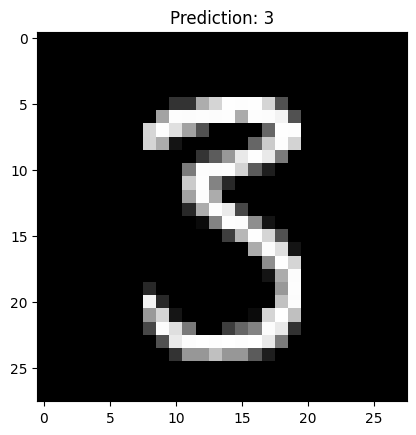

In [ ]:
pred = model.predict(test_images)

r_idx = np.random.randint(0, test_images.shape[0])

plt.imshow(test_images[r_idx], cmap='gray')
plt.title(f'Prediction: {np.argmax(pred[r_idx])}')
plt.show()

In [ ]:
model.save('mnist_with_letnet.keras')

In [ ]:
l_model = tf.keras.models.load_model('mnist_with_letnet.keras')
l_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,854 (347.09 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,428 (173.55 KB)